# Wrapper of Birch clustering algorithm #

first attempt at writing Python bindings for the Birch clustering algorithm (as implemented in Campari)

In [18]:
%matplotlib inline 
# imports
#import birch_2wrap as birch
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
import mdshare

In [7]:
# generating the data
nsnaps = 2000
nreplicas = 1
nfeats = 2
cludata = 100 * np.random.random_sample((nfeats, nsnaps)) + 0.

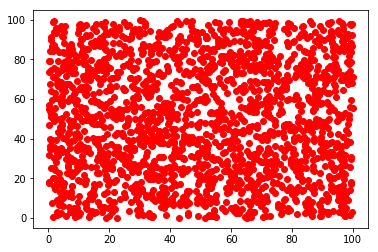

In [8]:
# plotting points
plt.plot(cludata[0,:], cludata[1,:], 'ro')
plt.show()

In [9]:
### running birch clustering directly (THIS SHOULD BE DISCOURAGED!)
#birch.pyclustering.birch_wrapper(nreplicas, cludata)

In [10]:
# read the clustering data:
clu_fn = "STRUCT_CLUSTERING.clu"
clus = np.loadtxt(clu_fn)
print(clus.dtype)
clus = clus.astype(int) # cast to int
print(clus.dtype)

float64
int64


ValueError: 'c' argument has 250000 elements, which is not acceptable for use with 'x' with size 2000, 'y' with size 2000.

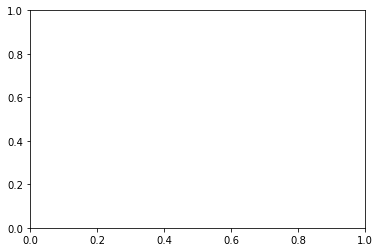

In [11]:
# replot coloring by cluster:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                     int(max(clus) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(cludata[0,:], cludata[1,:], s=20, color=colors[clus])
#plt.plot(cludata[0,:], cludata[1,:], 'o',)
plt.show()

Here we run the same clustering but using the wrapping class:

In [12]:
# import
from tree_based import TreeBased

In [13]:
mytree = TreeBased(cmaxrad=20.0, cradius=20.0, nlevels=8,
                     cdis_crit=7, nreplicas=1, dopix=True)
mytree.fit(cludata)

(array([[16.],
        [ 5.],
        [ 1.],
        ...,
        [ 7.],
        [ 6.],
        [ 5.]]),
 array([[1.000e+00, 1.999e+03, 1.771e+03, ..., 1.000e+00, 2.000e+02,
         1.799e+03],
        [2.000e+00, 1.998e+03, 9.170e+02, ..., 2.000e+00, 2.000e+02,
         1.798e+03],
        [3.000e+00, 1.997e+03, 8.960e+02, ..., 3.000e+00, 2.000e+02,
         1.797e+03],
        ...,
        [1.998e+03, 2.000e+00, 1.000e+02, ..., 2.000e+02, 2.000e+00,
         1.798e+03],
        [1.999e+03, 1.000e+00, 2.600e+01, ..., 2.000e+02, 1.000e+00,
         1.799e+03],
        [2.000e+03, 0.000e+00, 1.380e+02, ..., 2.000e+02, 0.000e+00,
         1.800e+03]]))

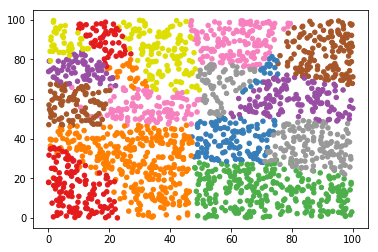

In [14]:
# read the clustering data:
clu_fn = "STRUCT_CLUSTERING.clu"
clus = np.loadtxt(clu_fn)
clus = clus.astype(int) # cast to int
# replot coloring by cluster:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                     int(max(clus) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(cludata[0,:], cludata[1,:], s=20, color=colors[clus])
#plt.plot(cludata[0,:], cludata[1,:], 'o',)
plt.show()

In [16]:
# what happens if I need two?
mytree1 = TreeBased()
mytree1.fit(cludata)
mytree.fit(cludata)

(array([[16.],
        [ 5.],
        [ 1.],
        ...,
        [ 7.],
        [ 6.],
        [ 5.]]),
 array([[1.000e+00, 1.999e+03, 1.771e+03, ..., 1.000e+00, 2.000e+02,
         1.799e+03],
        [2.000e+00, 1.998e+03, 1.066e+03, ..., 2.000e+00, 2.000e+02,
         1.798e+03],
        [3.000e+00, 1.997e+03, 1.464e+03, ..., 3.000e+00, 2.000e+02,
         1.797e+03],
        ...,
        [1.998e+03, 2.000e+00, 1.000e+02, ..., 2.000e+02, 2.000e+00,
         1.798e+03],
        [1.999e+03, 1.000e+00, 1.380e+02, ..., 2.000e+02, 1.000e+00,
         1.799e+03],
        [2.000e+03, 0.000e+00, 2.600e+01, ..., 2.000e+02, 0.000e+00,
         1.800e+03]]))

In [17]:
import birch_2wrap as birch
print(birch.pyclustering.clu_out)
print(clus)


ModuleNotFoundError: No module named 'birch_2wrap'

## Clustering an alanine dipeptide trajectory ##

In [7]:
fyc_fn = "../../../data/alanine_dipeptide/fycout/FYC.dat"
fyc = np.loadtxt(fyc_fn)
print(fyc.shape)
dih = np.transpose(fyc[:,2:4])
print(dih.shape)

(4800, 5)
(2, 4800)


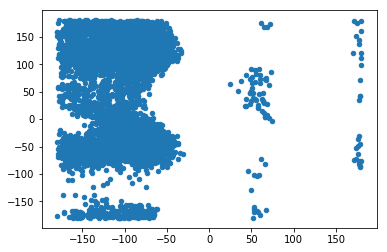

In [8]:
# plot of the "energy landscape"
plt.scatter(dih[0,:], dih[1,:], s=20)

In [13]:
# Now clustering using cdistance 1 and generating progind:
mytree_ala = TreeBased(cmaxrad=120.0, cradius=10.0, nlevels=8,
                       cdis_crit=1, nreplicas=1, dopix=True)
mytree_ala.fit(dih)

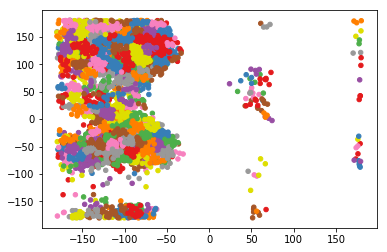

In [14]:
clu_fn = "STRUCT_CLUSTERING.clu"
clus = np.loadtxt(clu_fn)
clus = clus.astype(int) # cast to int
# replot coloring by cluster:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                     int(max(clus) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(dih[0,:], dih[1,:], s=20, color=colors[clus])
#plt.plot(cludata[0,:], cludata[1,:], 'o',)
plt.show()

In [15]:
# plotting the progress index:
pix_ala_fn = "PROGIDX_000000002586.dat"
pix_ala = np.loadtxt(pix_ala_fn)
print(pix_ala.shape)
nsnaps = pix_ala.shape[0]

(4800, 20)


(4800, 2)


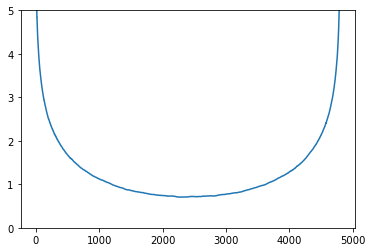

In [16]:
# now plotting:
pix_ala_redux = pix_ala[:,2:4]
print(pix_ala_redux.shape)
plt.plot(np.arange(1,nsnaps+1), -np.log(pix_ala_redux[:,1]/nsnaps))
axes = plt.gca()
axes.set_ylim([0,5])
plt.show()
# NOTE we are not able to get any information from the progress index as this is a MC run!!!!!

## Trying on an MD trajectory ##

In [24]:
import pyemma
### The first two lines were just needed to retrieve the data
#pdb = mdshare.fetch('alanine-dipeptide-nowater.pdb')#, working_directory='data')
#files = mdshare.fetch('alanine-dipeptide-*-250ns-nowater.xtc') #, working_directory='data')
pdb = 'alanine-dipeptide-nowater.pdb'
files = ['alanine-dipeptide-0-250ns-nowater.xtc','alanine-dipeptide-1-250ns-nowater.xtc',
         'alanine-dipeptide-2-250ns-nowater.xtc']
feat = pyemma.coordinates.featurizer(pdb)
feat.add_backbone_torsions(periodic=False)
data = pyemma.coordinates.load(files, features=feat)
data_concatenated = np.concatenate(data)

In [25]:
print(np.min(data_concatenated, axis=0))
data_radians = data_concatenated * 180.0/np.pi
print(np.max(data_radians, axis=0))
print(data_radians.shape)

[-3.1392481 -3.1415896]
[179.98668 179.99973]
(750000, 2)


In [ ]:
# Now clustering using cdistance 1 and generating progind:
mytree_ala = TreeBased(cmaxrad=120.0, cradius=10.0, nlevels=8,
                       cdis_crit=1, nreplicas=1, dopix=True)
mytree_ala.fit(np.transpose(data_radians))

In [9]:
# plotting the progress index:
pix_ala_fn = "PROGIDX_000000021931.dat"
pix_ala = np.loadtxt(pix_ala_fn)
print(pix_ala.shape)
nsnaps = pix_ala.shape[0]

(750000, 20)


(750000, 2)


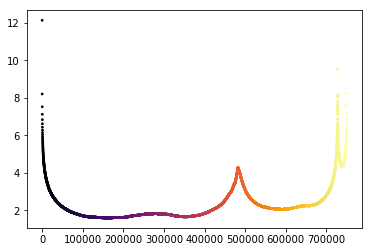

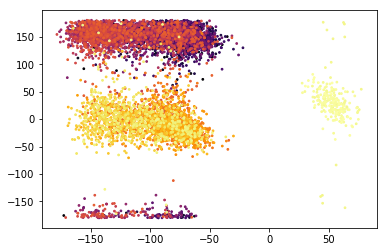

In [12]:
# now plotting:
pix_ala_redux = pix_ala[:,2:4]
print(pix_ala_redux.shape)
skip = 100
xaxis = np.arange(1,nsnaps+1,skip)
plt.scatter(xaxis, -np.log(pix_ala_redux[xaxis,1]/nsnaps), c=xaxis,s=3, cmap='inferno')
#axes = plt.gca()
#axes.set_ylim([0,5])
plt.show()
# pix plot
plt.scatter(data_radians[pix_ala_redux[xaxis,0].astype(int),0], 
            data_radians[pix_ala_redux[xaxis,0].astype(int),1], 
            s=3,
            c=xaxis,
            cmap='inferno')
#plt.plot(cludata[0,:], cludata[1,:], 'o',)
plt.show()